### 히스토그램(histogram)
- 단위 컬럼(Data)의 데이터의 빈도수를 그래프로 표현한다. 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# 스타일 지정
plt.style.use('classic') # ggplot

In [7]:
df = pd.read_csv("./Data/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


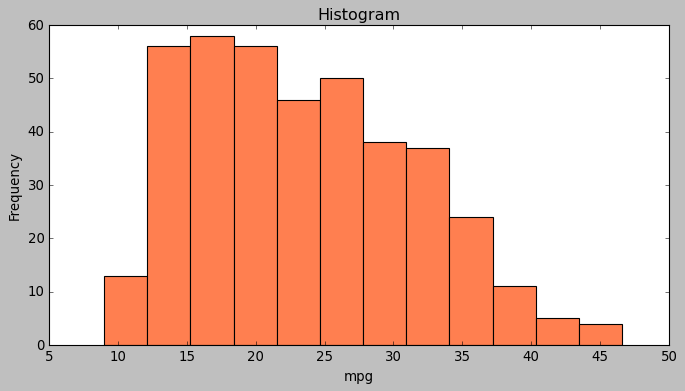

In [16]:
# 히스토그렘
df.mpg.plot(
  kind='hist',
  bins= 12, # default : 10
  color = 'coral',
  figsize=(10, 5)
)

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

> 자동차의 연비 값은 대부분 좌측으로 편향 되어 있어서 연비가 낮은 구간에 집중  되어 있는 경향을 보인다. 

---
## 산점도(산포도, Scatter)
- 서로 다른 두 데이터 사이의 관계를 나타낸다. 
- 이때 각 변수는 연속되는 값을 갖는다. 

In [17]:
# 스타일
plt.style.use('default')

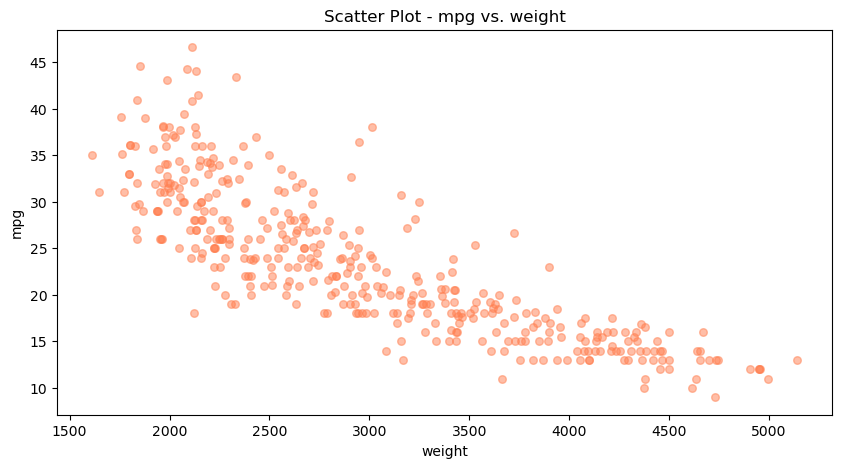

In [32]:
# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(
  kind='scatter',
  x='weight',
  y='mpg',
  color='coral',
  s=30,
  figsize=(10, 5),
  alpha = 0.5
)

plt.title('Scatter Plot - mpg vs. weight')
plt.show()

> 자동차의 무게와 연비 사이의 관계를 산점도로 표현.    
자동차의 무게가 높을수록 연비는 낮아지는 역상관을 표현하고 있다.  

---
### 버블(bubble) 차트
- 산점도 각점의 크기에 특정 데이터로 크기를 결정한다. 

In [29]:
# Cylinder 개수의 상대적 비율을 계산

cylinders_size = df.cylinders / df.cylinders.max() * 100

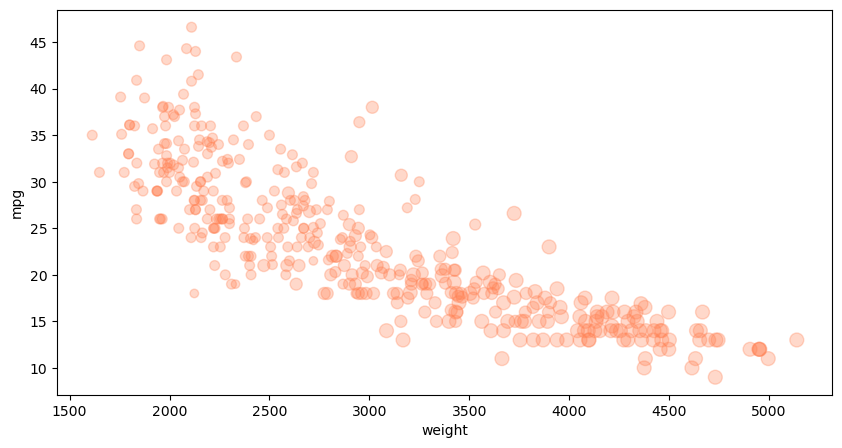

In [30]:
# 3개의 변수로 산점도 그리기
df.plot(
  kind='scatter',
  x='weight',
  y='mpg',
  color='coral',
  s=cylinders_size,
  figsize=(10, 5),
  alpha=0.3
)

plt.show()

### 크기를 컬러로 변경 및 파일로 저장

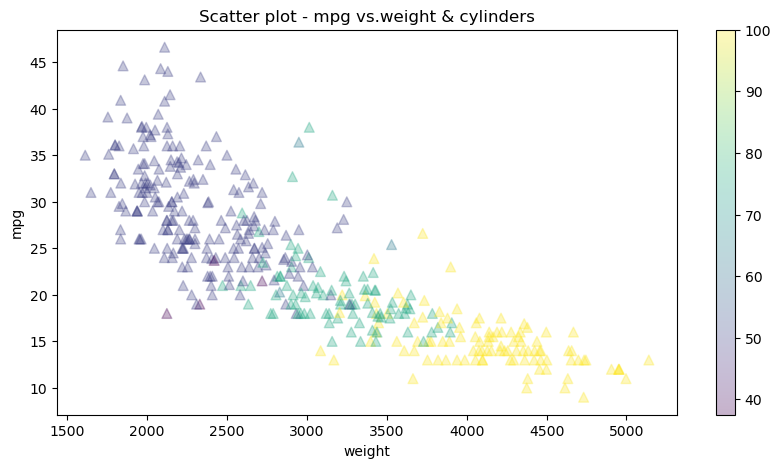

In [45]:
# 3개의 변수로 산점도 그리기
df.plot(
  kind='scatter',
  x='weight',
  y='mpg',
  marker = '^', # o, +, *, ^
  figsize=(10,5),
  cmap='viridis',
  c=cylinders_size,
  s=50,
  alpha=0.3
)

plt.title("Scatter plot - mpg vs.weight & cylinders")
plt.savefig("./Data/scatter.png")
plt.savefig("./Data/scatter_transparent.png", transparent=True)
plt.show()

In [34]:
cylinders_size.unique()

array([100. ,  50. ,  75. ,  37.5,  62.5])

----
### 파이 차트(Pie Chart)
- 원을 파이처럼 나누어서 표현
- 조각의 크기는 해당 변수에 속하는 데이터의 값의 크기에 비례하는 비율값

#### 자동차의 국가별 데이터 갯수를 파이차트로 표현

In [53]:
print((df.origin == 1).sum())
print((df.origin == 2).sum())
print((df.origin == 3).sum())

sr_nation = pd.Series([(df.origin == 1).sum(), (df.origin == 2).sum(), (df.origin == 3).sum()])
sr_nation

249
70
79


0    249
1     70
2     79
dtype: int64

In [62]:
sr_nation.index = ['USA', 'EU', "JAPAN"]
sr_nation

USA      249
EU        70
JAPAN     79
dtype: int64

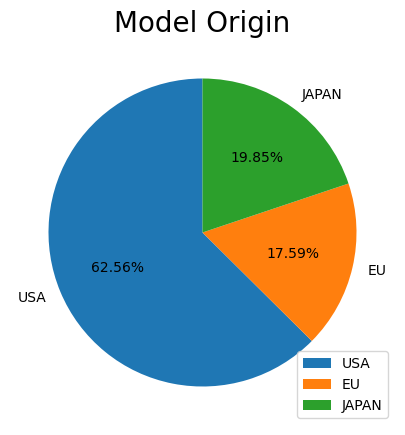

In [67]:
sr_nation.plot(
  kind='pie',
  figsize=(7, 5),
  autopct='%.2f%%',
  startangle=90
)

plt.title('Model Origin', size=20)
plt.legend(
  labels = sr_nation.index,
  loc='lower right' # upper left
)
plt.show()

---

In [69]:
# 국가별 Count를 계산하기 위해
df['count'] = 1
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,count
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1


In [70]:
# origin열을 기준으로 그룹화후 합계 연산
df_origin = df.groupby('origin').sum()
df_origin

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,name,count
origin,,,,,,,,,
1,5000.8,1556,61229.5,130.0165.0150.0150.0140.0198.0220.0215.0225.01...,837121.0,3743.4,18827,chevrolet chevelle malibubuick skylark 320plym...,249
2,1952.4,291,7640.0,46.0087.0090.0095.00113.090.0070.0076.0060.005...,169631.0,1175.1,5307,volkswagen 1131 deluxe sedanpeugeot 504audi 10...,70
3,2405.6,324,8114.0,95.0088.0088.0095.0065.0069.0095.0097.0092.009...,175477.0,1277.6,6118,toyota corona mark iidatsun pl510datsun pl510t...,79


In [71]:
# 국가별 이름 
df_origin.index = ['USA', 'EU', "JAPAN"]
df_origin

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,name,count
USA,5000.8,1556,61229.5,130.0165.0150.0150.0140.0198.0220.0215.0225.01...,837121.0,3743.4,18827,chevrolet chevelle malibubuick skylark 320plym...,249
EU,1952.4,291,7640.0,46.0087.0090.0095.00113.090.0070.0076.0060.005...,169631.0,1175.1,5307,volkswagen 1131 deluxe sedanpeugeot 504audi 10...,70
JAPAN,2405.6,324,8114.0,95.0088.0088.0095.0065.0069.0095.0097.0092.009...,175477.0,1277.6,6118,toyota corona mark iidatsun pl510datsun pl510t...,79


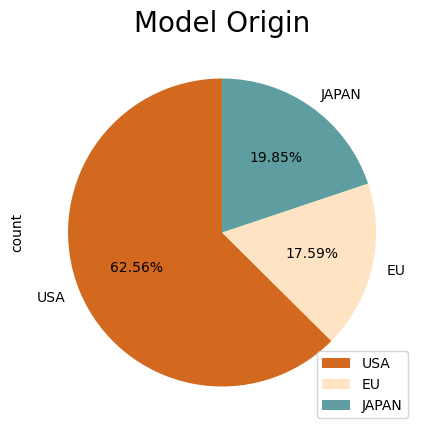

In [75]:
df_origin['count'].plot(
  kind='pie',
  figsize=(7, 5),
  autopct='%.2f%%',
  startangle=90,
  colors=['chocolate', 'bisque', 'cadetblue']
)

plt.title('Model Origin', size=20)
plt.legend(
  labels = df_origin.index,
  loc='lower right' # upper left
)
plt.show()

---
# 박스플롯(box plot)
- 범주형 데이터의 분포를 파악
- 이상치 데이터 확인

In [76]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

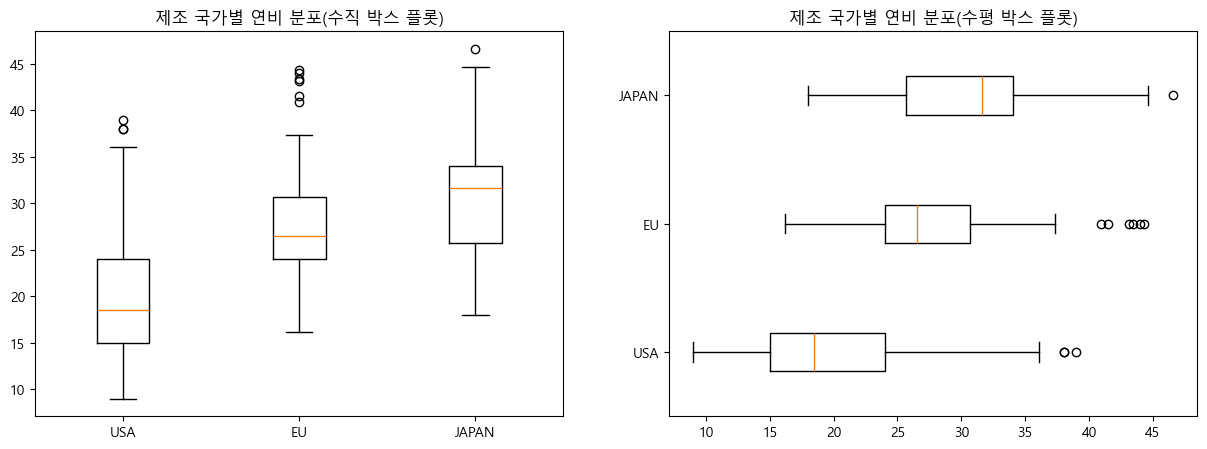

In [88]:
# 그래프 객체 생성(figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.boxplot(
  x=[
      df[df['origin'] == 1]['mpg'],
      df[df['origin'] == 2]['mpg'],
      df[df['origin'] == 3]['mpg']
    ],
  labels=['USA', 'EU', 'JAPAN']
)
ax1.set_title('제조 국가별 연비 분포(수직 박스 플롯)')

# ---------------------------------------------------

ax2.boxplot(
  x=[
      df[df['origin'] == 1]['mpg'],
      df[df['origin'] == 2]['mpg'],
      df[df['origin'] == 3]['mpg']
    ],
  labels=['USA', 'EU', 'JAPAN'],
  vert=False
)
ax2.set_title('제조 국가별 연비 분포(수평 박스 플롯)')

plt.show()

In [82]:
df[df['origin'] == 1]['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    27.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 249, dtype: float64